In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [21]:
import numpy as np
import pandas as pd

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update.csv')
df02 = pd.read_csv('./kaggle/input/spaceship-titanic/train_update2.csv')
df01 = pd.read_csv('./kaggle/input/spaceship-titanic/train.csv')

In [22]:
df.columns
df_copy = df

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Cabin_num',
       'Cabin_port', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported'],
      dtype='object')

### 분석 목표
- 3등실에서는 가난한 승객들이 타고 있었다(새로운 보금자리를 얻기 위해 승선, 과반수가 구조되지 못함)
- -> HomePlanet 과 Destination을 분석해서 위의 3등실 사람과 같은 사람을 예측
- 새로운 보금자리를 얻기 위해 승선
    - 나이와 Destination

In [23]:
df_copy['Destination'] = df_copy['Destination'].replace({0:'55 Cancri e', 1:'PSO J318.5-22',2:'TRAPPIST-1e'})
df_copy['HomePlanet'] = df_copy['HomePlanet'].replace({0:'Earth',1:'Europa',2:'Mars'})

<Figure size 1300x300 with 0 Axes>

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

Text(0.5, 1.0, 'Number of people travelled from HomePlanet to destination')

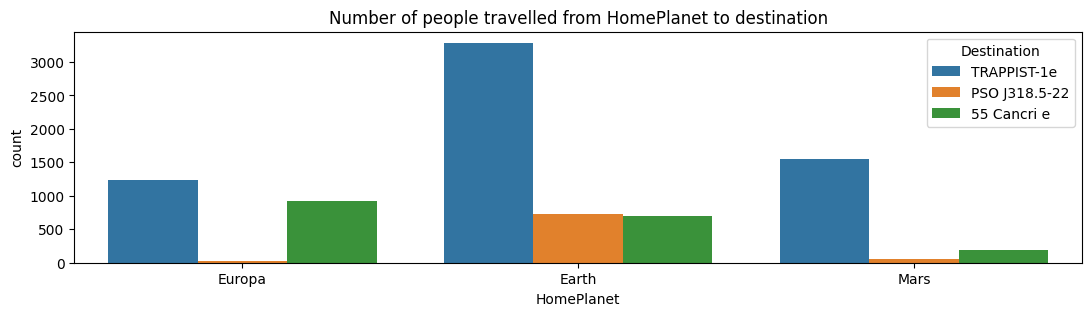

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
#Number of people travelled from HomePlanet to destination
plt.figure(figsize=(13,3))
sns.countplot(data=df_copy, x='HomePlanet', hue='Destination')
plt.title("Number of people travelled from HomePlanet to destination")
plt.show()

In [26]:
dfrate = pd.read_csv('./EDAdata/died_rate.csv')

In [27]:
dfrate.columns

Index(['index', 'HomePlanet_entire', 'HomePlanet_died', 'HomePlanet_rate',
       'index.1', 'CryoSleep_entire', 'CryoSleep_died', 'CryoSleep_rate',
       'index.2', 'Cabin_entire', 'Cabin_died', 'Cabin_rate', 'index.3',
       'Cabin_num_entire', 'Cabin_num_died', 'Cabin_num_rate', 'index.4',
       'Cabin_port_entire', 'Cabin_port_died', 'Cabin_port_rate', 'index.5',
       'Destination_entire', 'Destination_died', 'Destination_rate', 'index.6',
       'Age_entire', 'Age_died', 'Age_rate', 'index.7', 'VIP_entire',
       'VIP_died', 'VIP_rate', 'index.8', 'RoomService_entire',
       'RoomService_died', 'RoomService_rate', 'index.9', 'FoodCourt_entire',
       'FoodCourt_died', 'FoodCourt_rate', 'index.10', 'ShoppingMall_entire',
       'ShoppingMall_died', 'ShoppingMall_rate', 'index.11', 'Spa_entire',
       'Spa_died', 'Spa_rate', 'index.12', 'VRDeck_entire', 'VRDeck_died',
       'VRDeck_rate'],
      dtype='object')

In [28]:
HomePlanet_rate = dfrate['HomePlanet_rate'].dropna()
Destination_rate = dfrate['Destination_rate'].dropna()
HomePlanet_rate
Destination_rate

0    57.68
1    34.02
2    47.45
Name: HomePlanet_rate, dtype: float64

0    39.06
1    49.62
2    52.80
Name: Destination_rate, dtype: float64

([<matplotlib.patches.Wedge at 0x1d6731df550>,
 [Text(0.29187093242313045, 1.0605712417402484, 'Earth'),
  Text(-1.0707910349741616, -0.25180659129372296, 'Europa'),
  Text(0.5269015965310986, -0.965595519652499, 'Mars')],
 [Text(0.15920232677625296, 0.57849340458559, '41.5%'),
  Text(-0.5840678372586335, -0.13734904979657614, '24.4%'),
  Text(0.28740087083514465, -0.5266884652649994, '34.1%')])

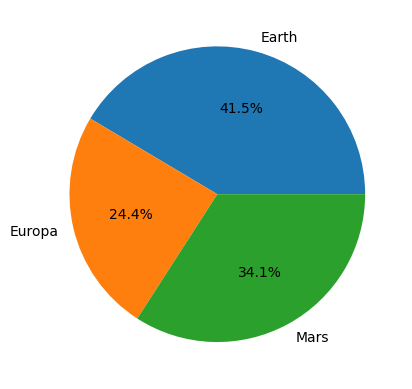

In [29]:
# 죽은 비율
labels = ['Earth', 'Europa','Mars']
plt.pie(HomePlanet_rate, labels=labels, autopct='%.1f%%')
plt.show()
# {0:'Earth',1:'Europa',2:'Mars'}
# 0:'55 Cancri e', 1:'PSO J318.5-22',2:'TRAPPIST-1e'}

([<matplotlib.patches.Wedge at 0x1d67318dba0>,
 [Text(0.7115469478637432, 0.8388688461170744, '55 Cancri e'),
  Text(-1.0491987909123566, 0.3304268408408266, 'PSO J318.5-22'),
  Text(0.4266995628103745, -1.0138675865700784, 'TRAPPIST-1e')],
 [Text(0.3881165170165871, 0.45756482515476776, '27.6%'),
  Text(-0.5722902495885581, 0.18023282227681447, '35.1%'),
  Text(0.23274521607838608, -0.5530186835836791, '37.3%')])

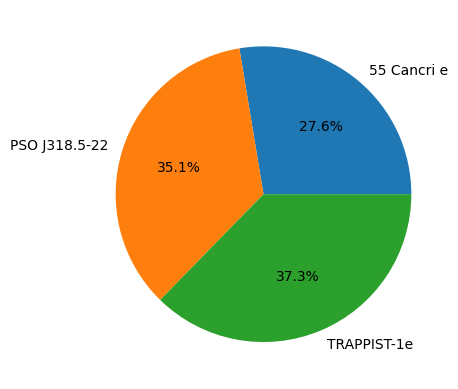

In [30]:
# 도착지와 분류 비율
labels01 = ['55 Cancri e', 'PSO J318.5-22','TRAPPIST-1e']
plt.pie(Destination_rate, labels=labels01, autopct='%.1f%%')
plt.show()
# {0:'Earth',1:'Europa',2:'Mars'}
# 0:'55 Cancri e', 1:'PSO J318.5-22',2:'TRAPPIST-1e'}

<Figure size 1500x400 with 0 Axes>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


Text(0.5, 1.0, 'Visualizing people of different ages travelled from HomePlanet')

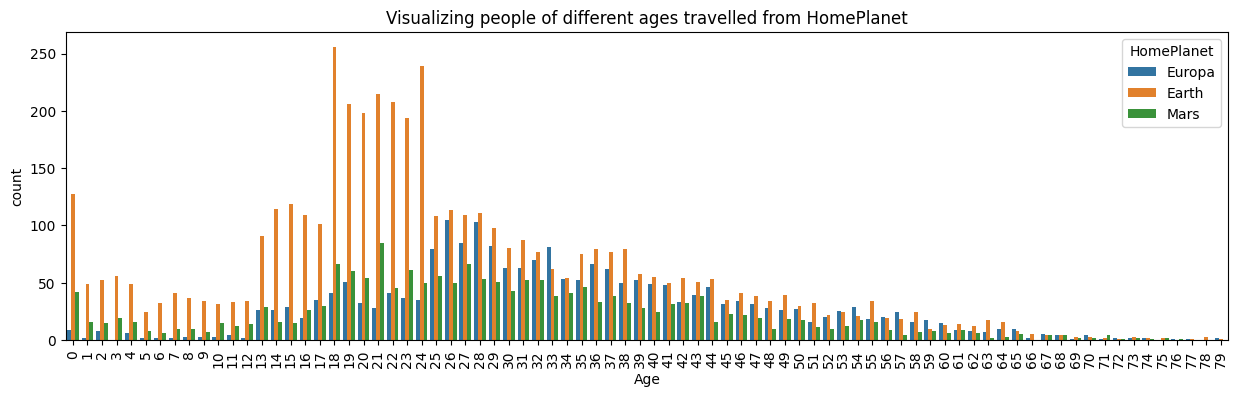

In [31]:
import warnings
#Visualizing people of different ages travelled from HomePlanet
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_copy[~(df_copy.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sns.countplot(data=Age_nomiss, x='Age', hue='HomePlanet')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled from HomePlanet")
plt.show()

### HomePlanet 별 나이 분포
지구가 나이가 적은 사람이 더 많음

<Figure size 1500x400 with 0 Axes>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


Text(0.5, 1.0, 'Visualizing people of different ages travelled to Destination')

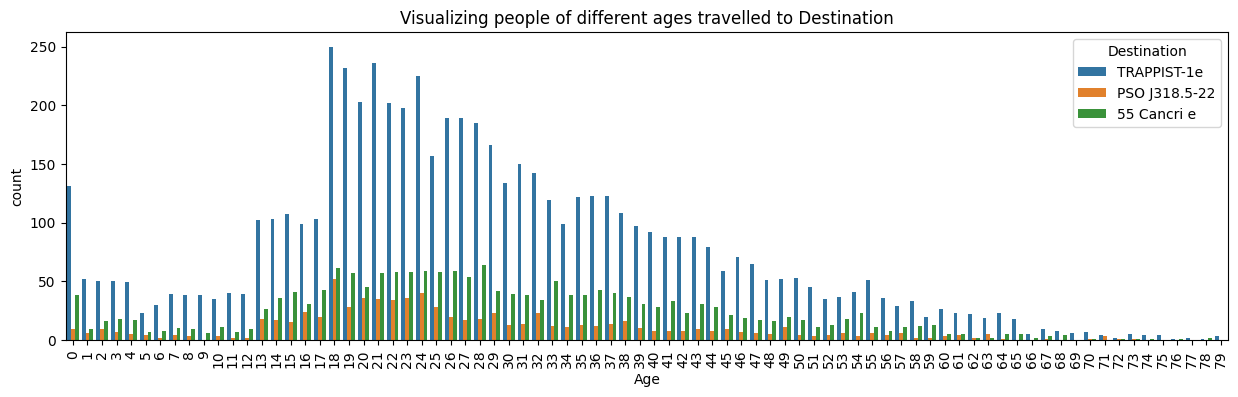

In [32]:
#Visualizing people of different ages travelled to Destination
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_copy[~(df_copy.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sns.countplot(data=Age_nomiss, x='Age', hue='Destination')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled to Destination")
plt.show()

### 어느 행성을 도착지로 많이 선택했는지
TRA > PSO > 55

<AxesSubplot: >

Text(0.5, 1.0, 'Average Age people travelled from HomePlanet to distination')

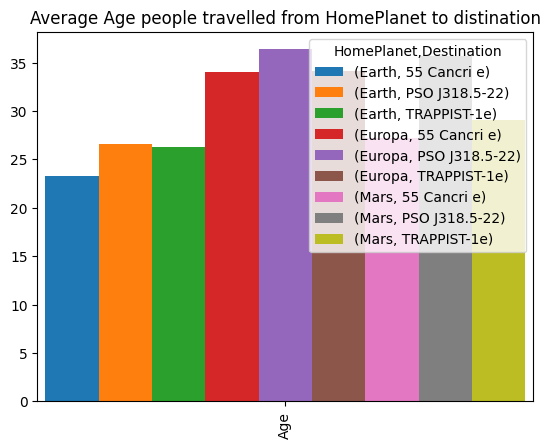

In [33]:
pd.pivot_table(data=df_copy, columns=['HomePlanet', 'Destination'], values='Age').plot(kind='bar', width=15)
plt.title("Average Age people travelled from HomePlanet to distination")
plt.show()

### 나이별 행성 선택율
Europa가 평균 나이가 가장 높다
pso가 평균 나이가 가장 높은 사람들의 도착지이다

<AxesSubplot: >

Text(0.5, 1.0, 'Average ampount spent for Room Service')

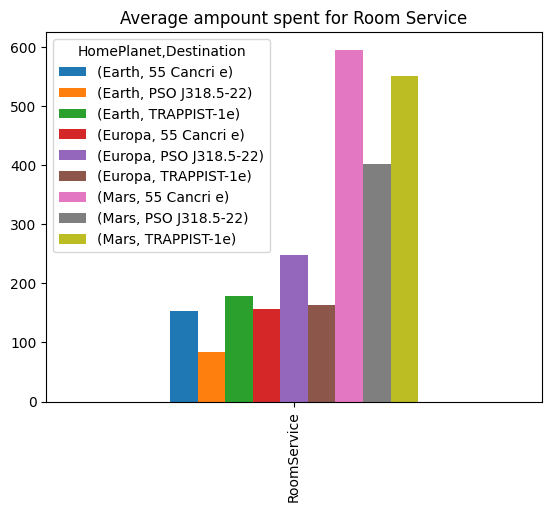

In [34]:
pd.pivot_table(data=df_copy, columns=['HomePlanet', 'Destination'], values='RoomService').plot(kind='bar')
plt.title("Average ampount spent for Room Service")
plt.show()

<AxesSubplot: >

Text(0.5, 1.0, 'Average ampount spent for FoodCourt')

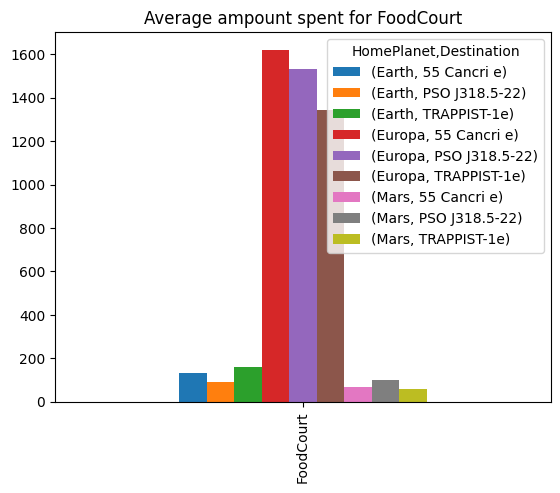

In [36]:
pd.pivot_table(data=df_copy, columns=['HomePlanet', 'Destination'], values='FoodCourt').plot(kind='bar')
plt.title("Average ampount spent for FoodCourt")
plt.show()

<AxesSubplot: >

Text(0.5, 1.0, 'Average ampount spent for ShoppingMall')

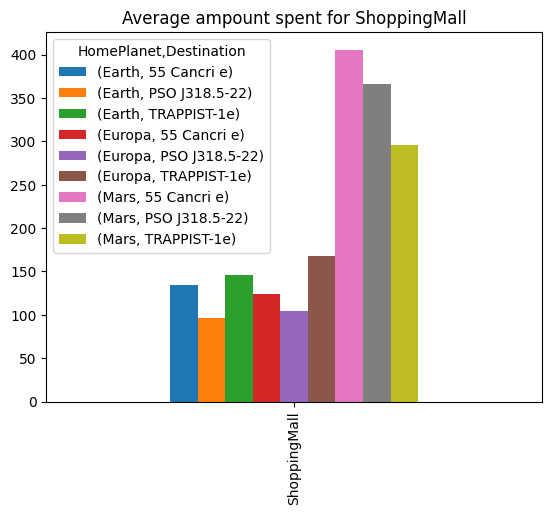

In [38]:
pd.pivot_table(data=df_copy, columns=['HomePlanet', 'Destination'], values='ShoppingMall').plot(kind='bar')
plt.title("Average ampount spent for ShoppingMall")

<AxesSubplot: >

Text(0.5, 1.0, 'Average ampount spent for Spa')

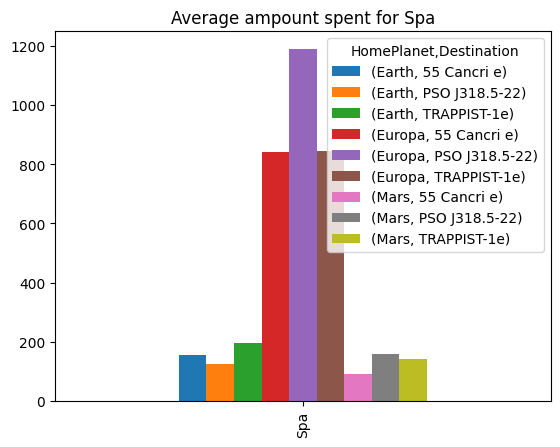

In [39]:
pd.pivot_table(data=df_copy, columns=['HomePlanet', 'Destination'], values='Spa').plot(kind='bar')
plt.title("Average ampount spent for Spa")
plt.show()

In [41]:
df_copy

,PassengerId,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,1,0,0,TRAPPIST-1e,39,0,0,0,0,0,0,Maham Ofracculy,0
1,0002_01,Earth,0,5,0,1,TRAPPIST-1e,24,0,109,9,25,549,44,Juanna Vines,1
2,0003_01,Europa,0,0,0,1,TRAPPIST-1e,58,1,43,3576,0,6715,49,Altark Susent,0
3,0003_02,Europa,0,0,0,1,TRAPPIST-1e,33,0,0,1283,371,3329,193,Solam Susent,0
4,0004_01,Earth,0,5,1,1,TRAPPIST-1e,16,0,303,70,151,565,2,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8772_02,Europa,0,3,90,0,55 Cancri e,53,0,0,1127,0,3939,400,Naosura Motled,0
8689,3821_01,Earth,0,4,309,0,PSO J318.5-22,35,0,0,2,0,0,867,Violan Mcphernard,0
8690,7746_01,Europa,1,4,289,0,55 Cancri e,35,0,0,0,0,0,0,Antinon Patoetic,1
8691,4167_01,Earth,0,4,309,0,PSO J318.5-22,33,0,0,440,0,0,334,Ninaha Deckerson,0


<AxesSubplot: >

Text(0.5, 1.0, 'Average ampount spent for Spa')

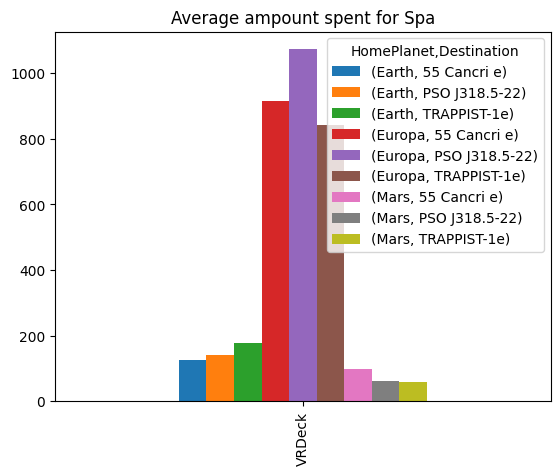

In [40]:
pd.pivot_table(data=df_copy, columns=['HomePlanet', 'Destination'], values='VRDeck').plot(kind='bar')
plt.title("Average ampount spent for Spa")
plt.show()